# Decision Tree

Dataset: NOAA Reef Check Bleaching Data from Kaggle

Link: https://www.kaggle.com/datasets/oasisdata/noaa-reef-check-coral-bleaching-data

The original dataset is used.

In [2]:
# Imported necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# Accessing the dataset
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/dataset/NOAA_Reef_Check__Bleaching_Data.csv'
df = pd.read_csv(url)
df.head()

Bleaching     Ocean  Year  Depth Storms HumanImpact     Siltation Dynamite  \
0        No  Atlantic  2005    4.0    yes        high         often     none   
1        No   Red Sea  2004    6.0     no        high  occasionally     none   
2        No   Pacific  1998    3.0     no         low         never     none   
3        No   Pacific  1998   10.0     no         low         never     none   
4        No  Atlantic  1997   10.0     no        high         never     none   

  Poison Sewage Industrial Commercial  
0   none   high       none       none  
1   none    low       none       none  
2   none   none        low       none  
3   none   none        low       none  
4   none   high   moderate       none

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.3)

train_data

Bleaching     Ocean  Year  Depth Storms HumanImpact     Siltation  \
8143        No  Atlantic  2007    7.0    yes         low         never   
3911        No   Pacific  2009    1.5    yes    moderate  occasionally   
4999        No   Pacific  2011   10.0    yes         low         never   
8094        No  Atlantic  2009   12.0    yes         low         never   
2101        No   Pacific  2006    3.0    yes        high  occasionally   
...        ...       ...   ...    ...    ...         ...           ...   
8758        No   Pacific  2008   11.0    yes         low  occasionally   
4392       Yes   Pacific  2001    3.0     no         low         never   
8948        No   Pacific  2008    1.0    yes    moderate  occasionally   
6053        No    Indian  1997    3.0    yes         low         never   
3237        No   Pacific  2008    1.0    yes        none         never   

      Dynamite    Poison Sewage Industrial Commercial  
8143      none      none   none       none       none  
3911      none       low   none       none       high  
4999      none      none    low       none        low  
8094      none      none   none       none       none  
2101  moderate  moderate   none       none   moderate  
...        ...       ...    ...        ...        ...  
8758      none      none   none       none       none  
4392      none      none   none       none       none  
8948      none      none   none       none       none  
6053      none      none   none       none       none  
3237      none      none   none       none       none  

[6377 rows x 12 columns]

In [6]:
test_data

Bleaching     Ocean  Year  Depth Storms HumanImpact     Siltation  \
2888        No   Pacific  2008    3.5    yes         low         never   
3454        No   Pacific  2010    1.7    yes        high  occasionally   
8265        No  Atlantic  2007    8.0    yes    moderate         never   
7880        No  Atlantic  1999    7.0    yes    moderate         never   
302         No   Pacific  2008    7.0    yes    moderate  occasionally   
...        ...       ...   ...    ...    ...         ...           ...   
1172        No   Pacific  2015   10.0     no        none         never   
6773        No  Atlantic  2002    3.0    yes    moderate         never   
3574        No   Pacific  2006    2.0     no    moderate  occasionally   
277         No   Pacific  2012    9.0    yes    moderate  occasionally   
6045        No    Indian  1997    3.0     no    moderate         never   

     Dynamite Poison    Sewage Industrial Commercial  
2888     none   none      none       none       none  
3454     none   none      none       none       none  
8265     none   none       low       none       high  
7880     none   none       low        low       none  
302      none   none       low       none       none  
...       ...    ...       ...        ...        ...  
1172     none   none       low   moderate        low  
6773     none   none  moderate       none       none  
3574     none   none      none       none       none  
277      none   none       low       none   moderate  
6045     none   none      high       none       none  

[2734 rows x 12 columns]

In [8]:
# Splitting the dataset into features and target variable
feature_cols=['Storms','HumanImpact', 'Siltation','Dynamite','Poison', 'Sewage', 'Industrial','Commercial']
X = test_data[feature_cols] # Features
y = test_data['Bleaching'] # Target variable

In [9]:
# .get_dummies() converts categorical data into dummy variables
X = pd.get_dummies(X)

In [10]:
X.head()

Storms_no  Storms_yes  HumanImpact_high  HumanImpact_low  \
2888          0           1                 0                1   
3454          0           1                 1                0   
8265          0           1                 0                0   
7880          0           1                 0                0   
302           0           1                 0                0   

      HumanImpact_moderate  HumanImpact_none  Siltation_always  \
2888                     0                 0                 0   
3454                     0                 0                 0   
8265                     1                 0                 0   
7880                     1                 0                 0   
302                      1                 0                 0   

      Siltation_never  Siltation_occasionally  Siltation_often  ...  \
2888                1                       0                0  ...   
3454                0                       1                0  ...   
8265                1                       0                0  ...   
7880                1                       0                0  ...   
302                 0                       1                0  ...   

      Sewage_moderate  Sewage_none  Industrial_high  Industrial_low  \
2888                0            1                0               0   
3454                0            1                0               0   
8265                0            0                0               0   
7880                0            0                0               1   
302                 0            0                0               0   

      Industrial_moderate  Industrial_none  Commercial_high  Commercial_low  \
2888                    0                1                0               0   
3454                    0                1                0               0   
8265                    0                1                1               0   
7880                    0                0                0               0   
302                     0                1                0               0   

      Commercial_moderate  Commercial_none  
2888                    0                1  
3454                    0                1  
8265                    0                0  
7880                    0                1  
302                     0                1  

[5 rows x 30 columns]

In [11]:
# Importing the necessary libraries
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import pandas as pd
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import warnings

warnings.filterwarnings("ignore")

In [12]:
# Using DecisionTreeClassifier from sklearn with entropy as the criterion
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict = model.predict(X)

# Getting the accuracy score of the prediction
print(metrics.accuracy_score(y,y_predict))

0.9798829553767374


In [13]:
# Printing the arrays of y and y_predict
# .ravel() returns a 1d array of the input-array elements with the same type
print(y.ravel())
print(y_predict.ravel())

['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']


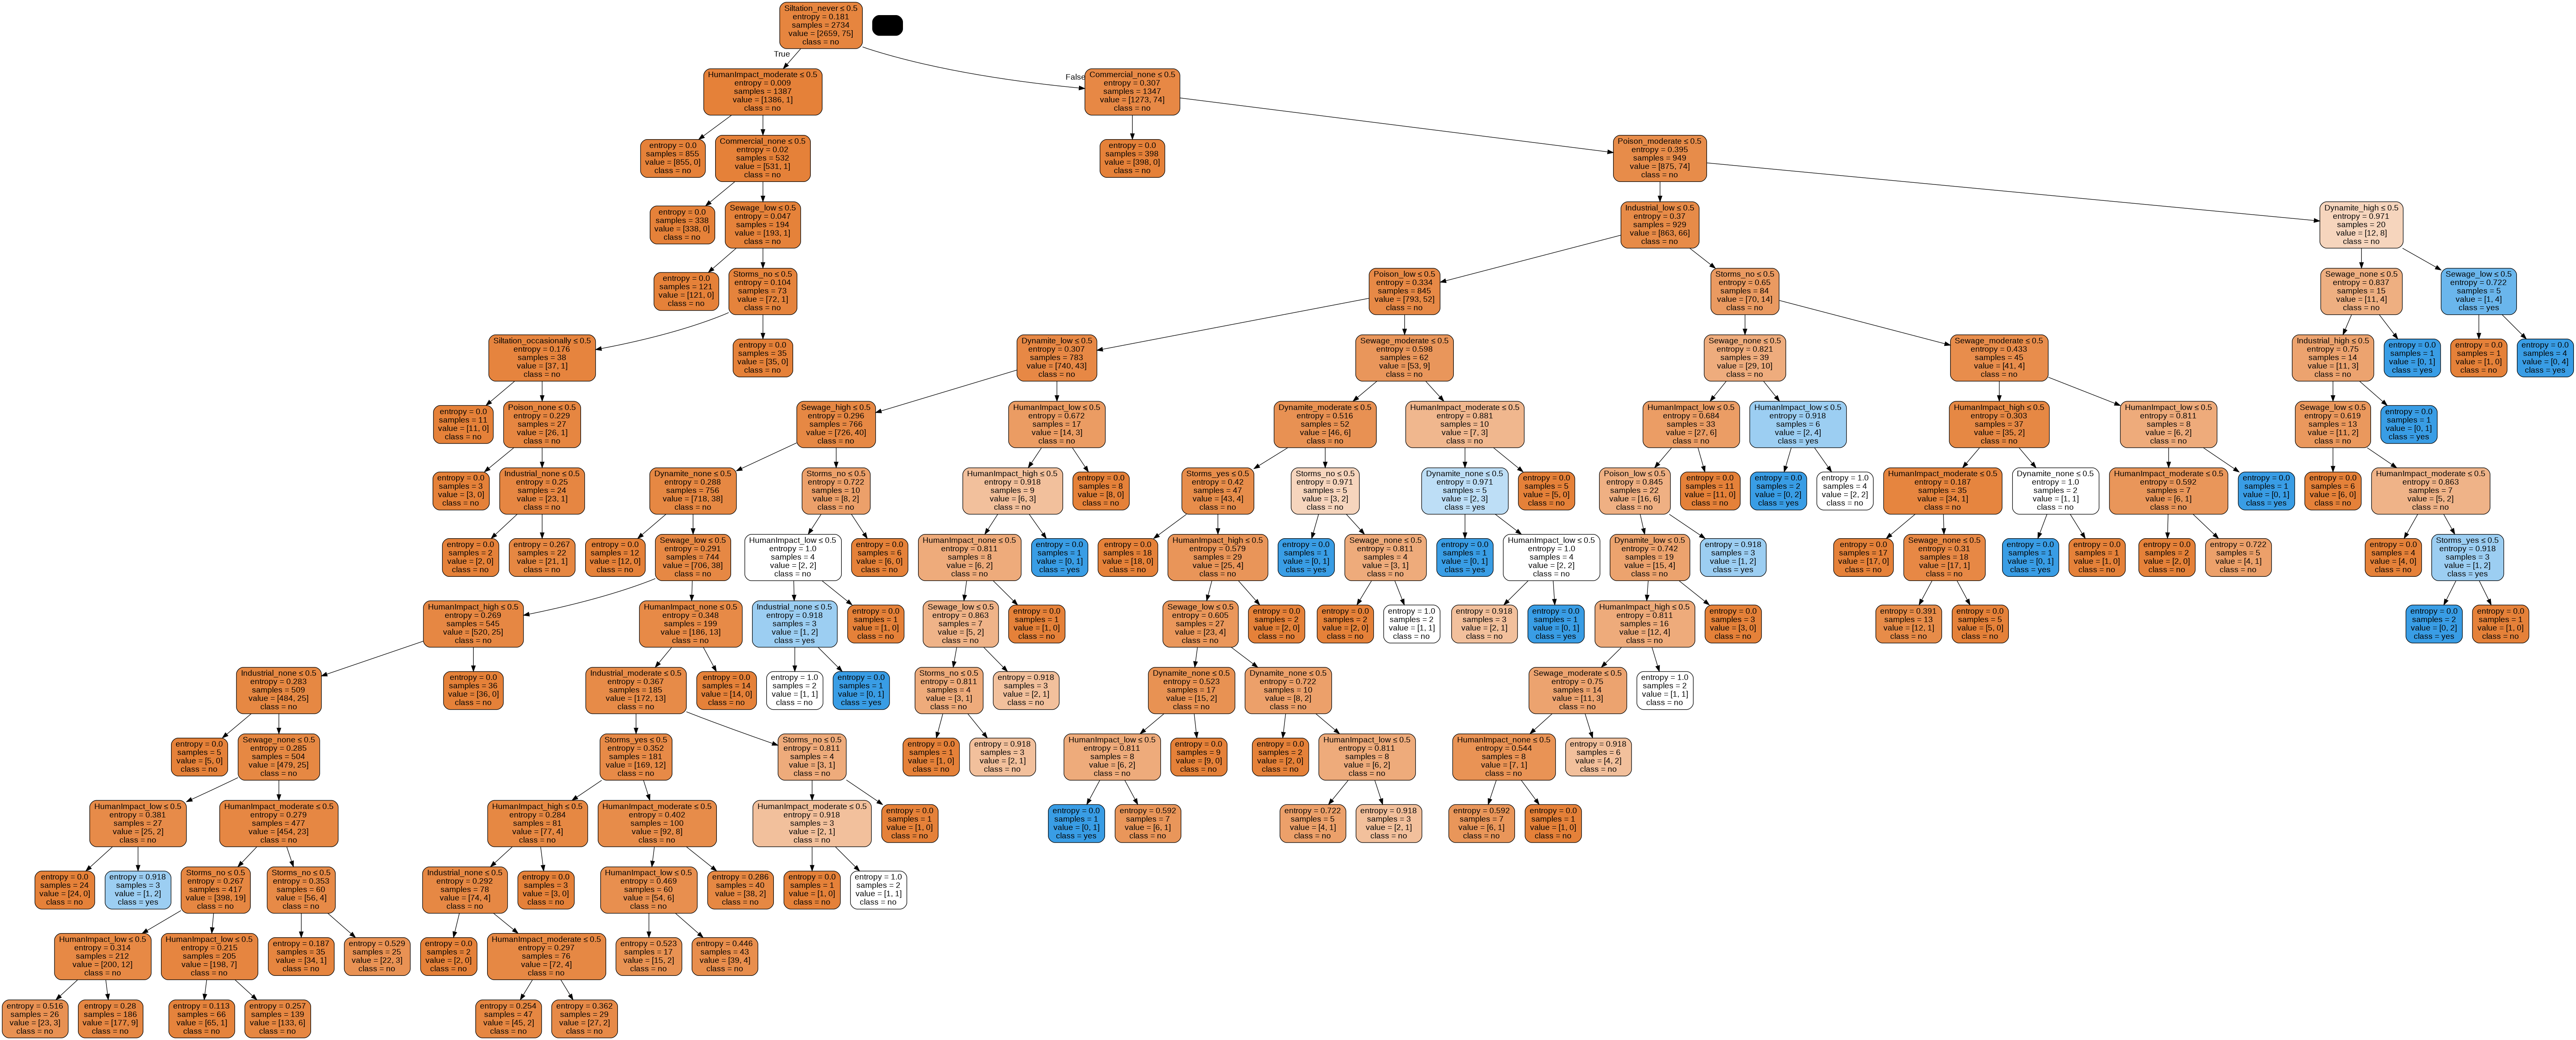

In [14]:
# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching_probability.png')
Image(graph.create_png())

0.9755370864042653
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']


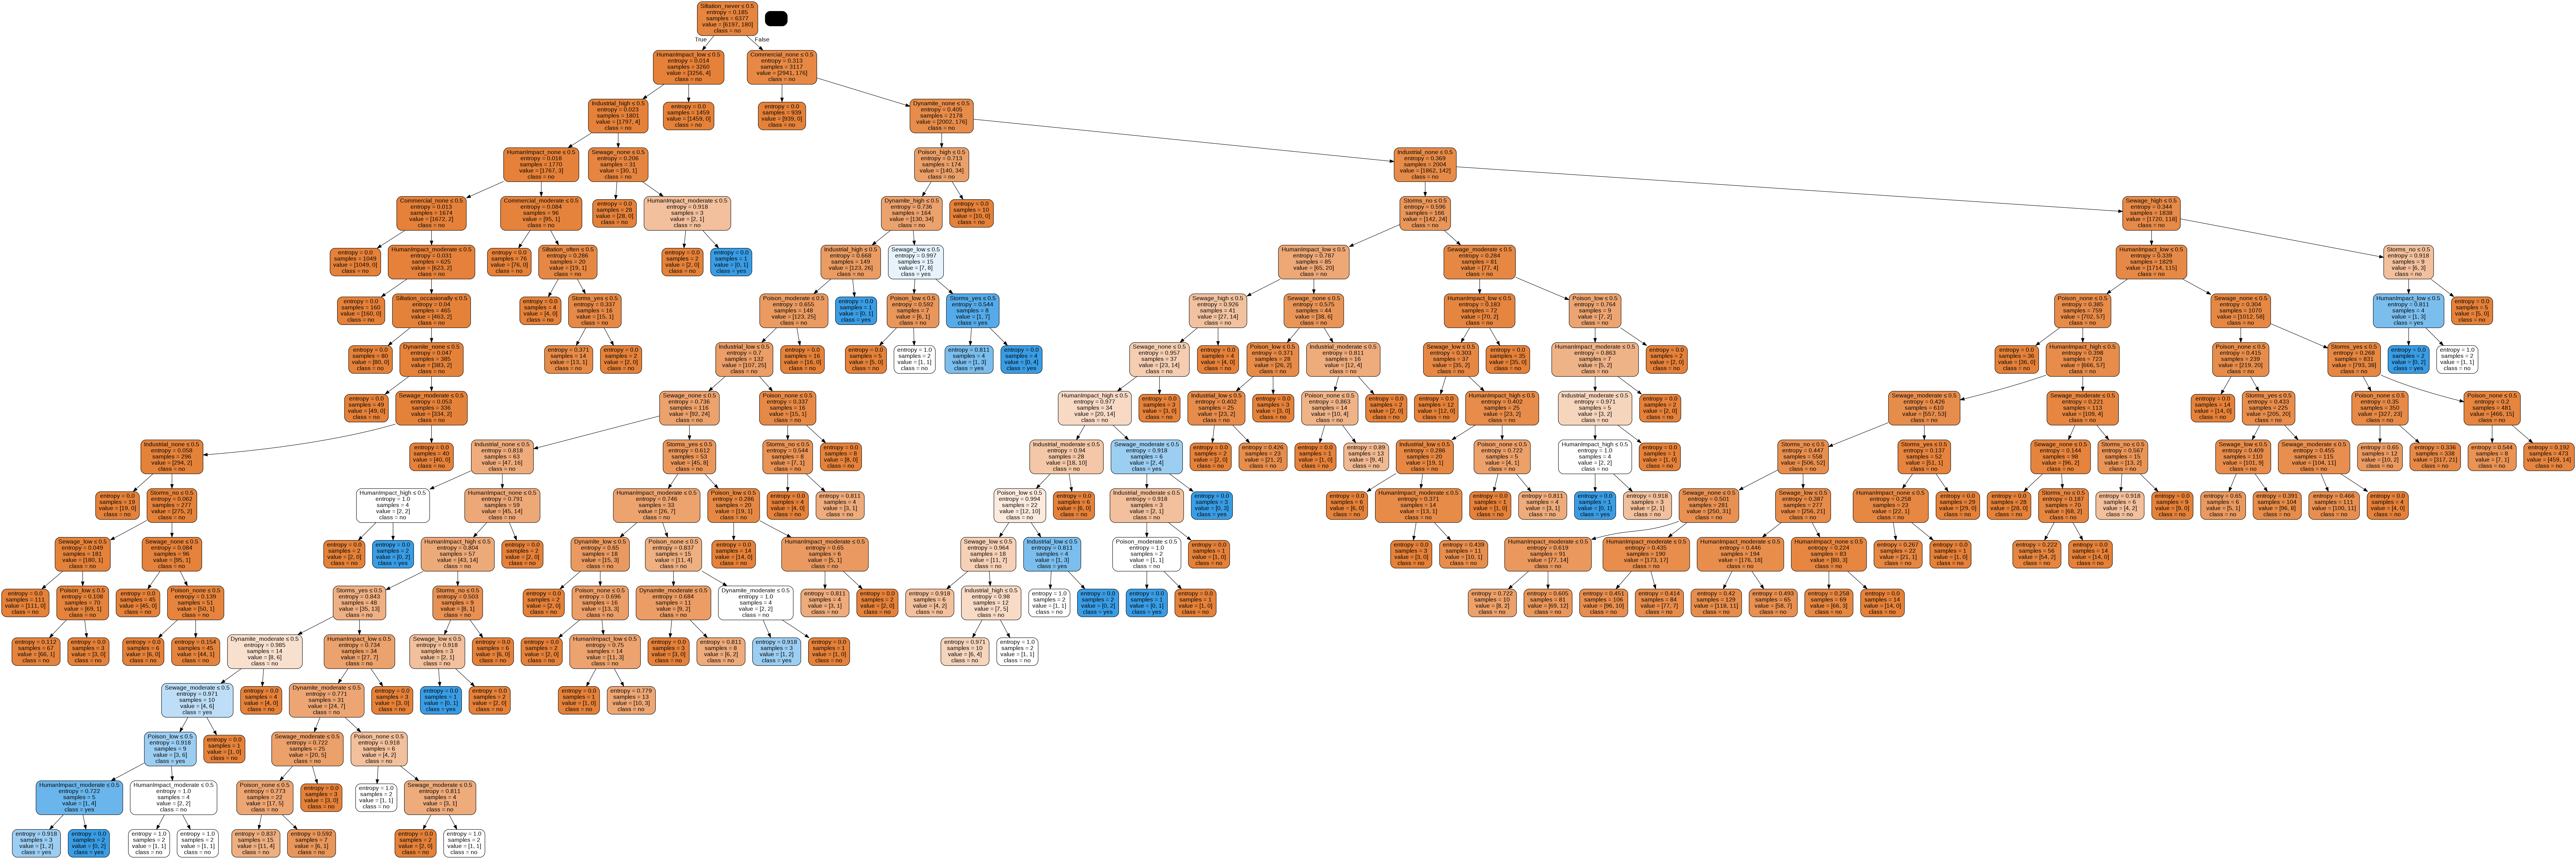

In [16]:
# Decision tree for train data

feature_cols=['Storms','HumanImpact', 'Siltation','Dynamite','Poison', 'Sewage', 'Industrial','Commercial']
X = train_data[feature_cols] # Features
y = train_data['Bleaching'] # Target variable

X = pd.get_dummies(X)

# Using DecisionTreeClassifier from sklearn with entropy as the criterion
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict = model.predict(X)

# Getting the accuracy score of the prediction
print(metrics.accuracy_score(y,y_predict))

# Printing the arrays of y and y_predict
# .ravel() returns a 1d array of the input-array elements with the same type
print(y.ravel())
print(y_predict.ravel())

# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching_probability_train.png')
Image(graph.create_png())

# Evaluation

Based on our testing, the accuracy scores yielded very similar results as shown here:  

> Testing data = 0.9798829553767374
>
> Training data = 0.9755370864042653

One thing to note, despite being very similar in accuracy score, they are both different looking trees in comparison. 

Because the accuracy of the test data is very similar, the training of the data is successful.
